# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



df = pd.read_csv('data/human_body_temperature.csv')

In [17]:
# Display the dataframe
df = df.sort_values("temperature")
df.head()

,temperature,gender,heart_rate
125,96.3,M,70.0
39,96.4,F,69.0
11,96.7,F,62.0
105,96.7,M,71.0
95,96.8,F,75.0


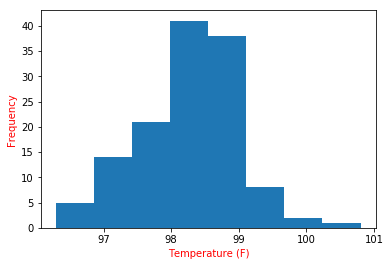

In [18]:
# (1) 

# A histogram of temperature data shows a normal distribution
plt.hist(df["temperature"], bins=8)
plt.xlabel("Temperature (F)", color="red")
plt.ylabel("Frequency", color="red")
plt.show()

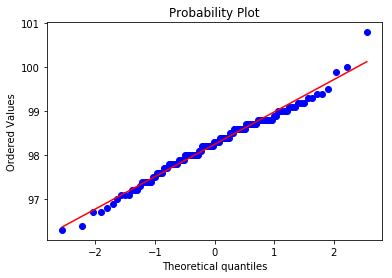

In [19]:
# (1) 

# A normal probability plot of temperature data shows a good fit of the data to normal quantiles
stats.probplot(df["temperature"], dist="norm", plot=plt)
plt.show()

In [20]:
# (2) 

# Because the sample size has an approximately normal distribution,
# we know the sample size is large enough to make statistical inference about the population.

In [21]:
# (2)

# The observations are considered independent because the sample size of 130 is less than 10% of the human population,
# thus our results are not affected by lack of replacement

In [22]:
# (3)

# Functions to draw bootstrap replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

#Shift the temperature data to match the null hypothesis that the mean is 98.6
sample_temp = df["temperature"]
translated_sample_temp = sample_temp - np.mean(sample_temp) + 98.6

# Draw bootstrap replicates of the data
bs_reps = draw_bs_reps(translated_sample_temp, np.mean, 10000)

# Calculate the p value
p = np.sum(bs_reps <= np.mean(sample_temp)) / 10000

# print p
print(p)

# The p value is 0, indicating that we'd reject the null hypothesis that the sample mean is the same as the known mean

0.0


In [23]:
# (3)

# This would be a one-sample test because we are comparing the mean of our one sample to a known mean

# It is most appropriate the use the t test because the population standard deviation is not known
# and results of a z and t test are nearly identical above a sample size of 30

# Calculate the t statistic and p-value
stats.ttest_1samp(sample_temp, 98.6)

# A very small p value indicates we should reject the null hypothesis that the sample mean the same as the known mean
# This result is different from the bootstrap test in that we get an extremely small value for p; 
# whereas we get a p of 0 with the bootstrap test

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [24]:
# (3)

# Calculate the z-statistic
z = (np.mean(sample_temp) - 98.6) / (np.sqrt(np.var(sample_temp)/130))

p_value = stats.norm.sf(abs(z))

print(z)
print(p_value)

# The z test gives us an extremely small p value, resulting in rejecting the null hypothesis
# The results are different in that the p value for the z score is smaller by a factor of 10
# This is because the z test assumes you know the standard deviation of the population

-5.475925202078339
2.1761575829383514e-08


In [25]:
# (4)

# Draw a sample size of 10
small_sample = np.random.choice(sample_temp, size=10)

# Repeat the t test
stats.ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-1.184885474765857, pvalue=0.26640661268883054)

In [26]:
# (4)

# Repeat the z test
z_small = (np.mean(small_sample) - 98.6) / (np.sqrt(np.var(small_sample)/10))
p_small = stats.norm.sf(abs(z_small))
print(z_small)
print(p_small)

-1.2489789555700244
0.10583638552726093


In [27]:
# (4)

# The t test is appropriate to use for the small sample
# The z test results in a larger p value, which increases the chances of making a type I error
# This supports that the t test is the best test for sample sizes less than 30

In [28]:
# (5)

# Draw bootstrap replicates
bs_reps2 = draw_bs_reps(sample_temp, np.mean, 10000)

# Bootstrap confidence interval
bs_ci = np.percentile(bs_reps2,[2.5,97.5])
print(bs_ci)

# The 95% confidence interval tells us that a temperature is abnormal when outside the range of 98.12 to 98.38 F

[98.12307692 98.37461538]


In [29]:
# (5)

# 95% margin of error
moe = 1.96 * np.sqrt(np.var(sample_temp)/130)
print(moe)

# 95% Confidence interval
ci_low = np.mean(sample_temp) - moe
ci_high = np.mean(sample_temp) + moe
print("The 95% confidence interval is " + str(ci_low) + " " + str(ci_high))

0.12555096480257896
The 95% confidence interval is 98.12367980442818 98.37478173403335


In [30]:
# (6)


# Function to generate permutation samples
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Function to draw permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Function to calculate the difference of means between two arrays
def diff_of_means(data_1, data_2):

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Find the difference of means betwen men's and women's mean temperature
temp_men = df["temperature"].loc[df["gender"] == "M"]
temp_women = df["temperature"].loc[df["gender"] == "F"]
observed_diff_means = diff_of_means(temp_women, temp_men)

# Create permutation replicates and calculate their difference of means
perm_replicates = draw_perm_reps(temp_women, temp_men,
                                 diff_of_means, size=10000)

# Compute the p value
p = np.sum(perm_replicates >= observed_diff_means) / len(perm_replicates)
p

0.0138

In [31]:
# (6)

# To test the hypothesis that the mean body temperature is the same between men and women I used perumation replicates.
# With a p value of <5%, we reject the null hypothesis that the average temperature of women and men are equal.
# Is it very improbably to observe a difference of means that is equal to or greater than the observed difference
# in means if the average temperature were equal